# <center>Homework1 Report
    
## <center>course: COMP9417
    
## <center>term: 2020T1
    
## <center>full name: Zhaokun Su 

## <center>zID: z5235878

### Question 1
**part(a). [0.5 mark]** 

the accuracy has a general tendency to increase with a larger training size

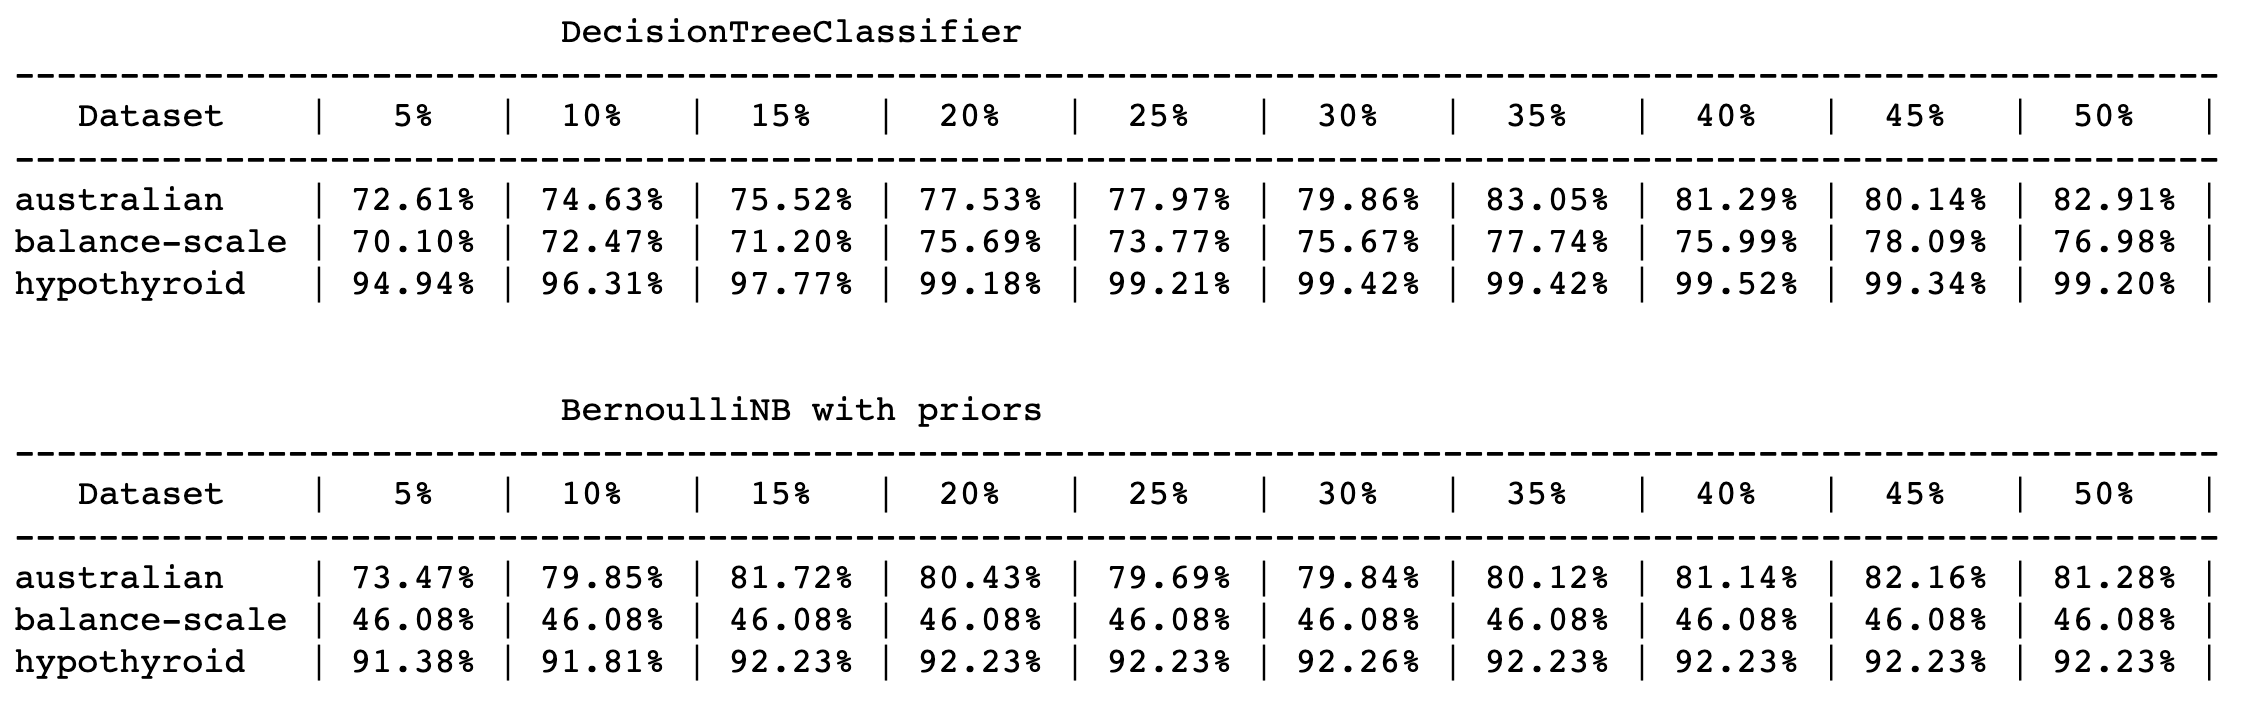

**part(b). [0.5 mark]**

**(1)** none of the 6 models show a learning curve    **False**

**(2)** all of the 6 models show a learning curve    **False**

**(3)** most of the 6 models show a learning curve    **True**

**(4)** All 3 Decision Tree models are generally better than Bernoulli Naive Bayes models    **False**

**(5)** Some Bernoulli Naive Bayes models are better than Decision Tree models    **True**

**so all true statements are (3) and (5)**

**part(c). [0.5 mark]**

#### After adding the new line, BNB model results with and without priors are shown below:

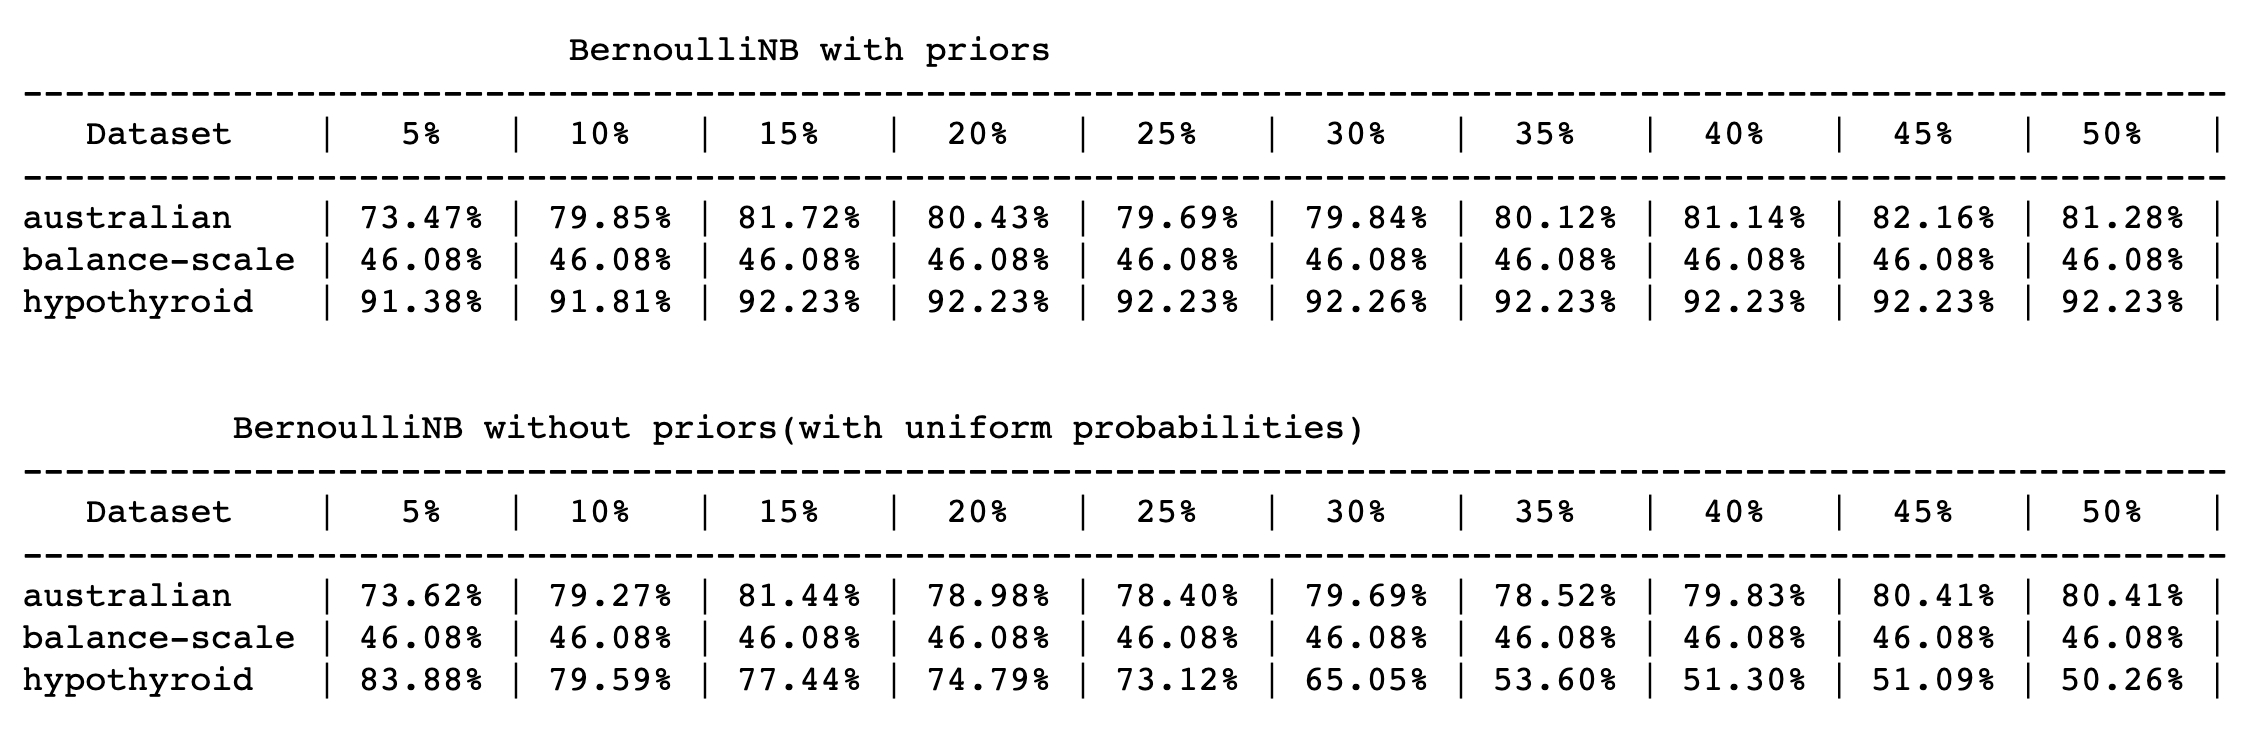

**(1)** BNB preforms better with priors   **True** 

**(2)** BNB preforms better without priors    **False**

**(3)** there is no difference in performance when using BNB with or without priors    **False**

**so the true statement is (1)**

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math
import copy

In [48]:
def pre_processing(dataframe, features):
    for ft in features:
        max_value = dataframe[ft].max()
        min_value = dataframe[ft].min()
        dataframe[ft] = [(x - min_value) / (max_value - min_value) for x in dataframe[ft]]
    return dataframe

In [49]:
# load data
csv_file = 'titanic.csv'
df = pd.read_csv(csv_file)
feature_vectors = ['Pclass', 'Sex', 'Age', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard']

df

,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,3,1,20,1,0,0
1,1,0,30,1,0,1
2,3,0,20,0,0,1
3,1,0,30,1,0,1
4,3,1,30,0,0,0
...,...,...,...,...,...,...
882,2,1,20,0,0,0
883,1,0,10,0,0,1
884,3,0,0,1,2,0
885,1,1,20,0,0,1


In [50]:
# step 1: pre-processing data
df = pre_processing(df, feature_vectors)
df

,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,1.0,1.0,0.250,0.125,0.000000,0
1,0.0,0.0,0.375,0.125,0.000000,1
2,1.0,0.0,0.250,0.000,0.000000,1
3,0.0,0.0,0.375,0.125,0.000000,1
4,1.0,1.0,0.375,0.000,0.000000,0
...,...,...,...,...,...,...
882,0.5,1.0,0.250,0.000,0.000000,0
883,0.0,0.0,0.125,0.000,0.000000,1
884,1.0,0.0,0.000,0.125,0.333333,0
885,0.0,1.0,0.250,0.000,0.000000,1


In [52]:
training_dataset = df.loc[0:620,:]
testing_dataset = df.loc[620:887,:]

training_dataset_x = training_dataset.loc[:, feature_vectors]
testing_dataset_x = testing_dataset.loc[:, feature_vectors]
training_dataset_y = training_dataset.loc[:, ['Survived']]
testing_dataset_y = testing_dataset.loc[:, ['Survived']]


In [55]:
clf = DecisionTreeClassifier()
clf.fit(training_dataset_x, training_dataset_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(testing_dataset_x)
accuracy_score(testing_dataset_y,predicted) # 计算模型对验证数据集的准确率
# from sklearn.metrics import confusion_matrix
# m = confusion_matrix(test_y,predicted)  #模型对验证数据集的混肴矩阵
# print(m)

0.8314606741573034